# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
import openweathermapy.core as owm

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
#See ex 6.2.9 key activity for this hw. import openweathermapy.core as owm  
#Create dictionary for city information
#Create settings dictionary with information we're interested in 
City_dict = {}
settings = {"units": "imperial", "appid": weather_api_key}
#Get current weather
record_count = 1
set_count = 1
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        #6.2.9 Reference
        current_weather_city = owm.get_current(city, **settings)
        # Add city and weather object into 
        City_dict[city] = current_weather_city
        record_count += 1
        if record_count == 50:
            record_count = 1
            set_count += 1
    except:
       print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | husavik
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | boddam
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tazovskiy
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | kautokeino
Processing Record 13 of Set 1 | aberdeen
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | tripoli
Processing Record 16 of Set 1 | havre-saint-pierre
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | ponta delgada
Processing Record 20 of Set 1 | namie
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | be

Processing Record 22 of Set 4 | sao filipe
Processing Record 23 of Set 4 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 23 of Set 4 | lianran
Processing Record 24 of Set 4 | san buenaventura
Processing Record 25 of Set 4 | madison
Processing Record 26 of Set 4 | lompoc
Processing Record 27 of Set 4 | castro
Processing Record 28 of Set 4 | port macquarie
Processing Record 29 of Set 4 | xining
Processing Record 30 of Set 4 | kamphaeng phet
Processing Record 31 of Set 4 | chuy
Processing Record 32 of Set 4 | guarapari
Processing Record 33 of Set 4 | camana
Processing Record 34 of Set 4 | cidreira
Processing Record 35 of Set 4 | ulaangom
Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | wewak
Processing Record 38 of Set 4 | panjab
Processing Record 39 of Set 4 | carolina
Processing Record 40 of Set 4 | sur
Processing Record 41 of Set 4 | ozernovskiy
Processing Record 42 of Set 4 | arroyo
Processing Record 43 of Set 4 | matagami
Processing Record 44

City not found. Skipping...
Processing Record 5 of Set 8 | baculin
Processing Record 6 of Set 8 | jiuquan
Processing Record 7 of Set 8 | kudahuvadhoo
Processing Record 8 of Set 8 | marondera
Processing Record 9 of Set 8 | mecca
Processing Record 10 of Set 8 | solnechnyy
Processing Record 11 of Set 8 | quirinopolis
Processing Record 12 of Set 8 | eyl
Processing Record 13 of Set 8 | batesville
Processing Record 14 of Set 8 | norman wells
Processing Record 15 of Set 8 | kargil
Processing Record 16 of Set 8 | valleyview
Processing Record 17 of Set 8 | alugan
Processing Record 18 of Set 8 | aqtobe
Processing Record 19 of Set 8 | yarada
Processing Record 20 of Set 8 | kundiawa
Processing Record 21 of Set 8 | horizontina
Processing Record 22 of Set 8 | basco
Processing Record 23 of Set 8 | tromso
Processing Record 24 of Set 8 | wukari
Processing Record 25 of Set 8 | soma
Processing Record 26 of Set 8 | henties bay
Processing Record 27 of Set 8 | pisco
Processing Record 28 of Set 8 | hebertvil

Processing Record 27 of Set 11 | hirara
Processing Record 28 of Set 11 | mrirt
City not found. Skipping...
Processing Record 28 of Set 11 | tessalit
Processing Record 29 of Set 11 | lisakovsk
Processing Record 30 of Set 11 | tezu
Processing Record 31 of Set 11 | beipiao
Processing Record 32 of Set 11 | keetmanshoop
Processing Record 33 of Set 11 | qaqortoq
Processing Record 34 of Set 11 | matamoros
Processing Record 35 of Set 11 | gairo
Processing Record 36 of Set 11 | chhabra
Processing Record 37 of Set 11 | sirari
Processing Record 38 of Set 11 | rungata
City not found. Skipping...
Processing Record 38 of Set 11 | mondovi
Processing Record 39 of Set 11 | sudak
Processing Record 40 of Set 11 | sakakah
Processing Record 41 of Set 11 | moletai
Processing Record 42 of Set 11 | khonsa
Processing Record 43 of Set 11 | hatillo
Processing Record 44 of Set 11 | bud
Processing Record 45 of Set 11 | mundo novo
Processing Record 46 of Set 11 | den helder
Processing Record 47 of Set 11 | fuerte o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# Create DataFrame to store: City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
weather_df = pd.DataFrame([[City_dict[city]("name"), 
                            City_dict[city]("coord.lat"), 
                            City_dict[city]("coord.lon"), 
                            City_dict[city]("main.temp_max"), 
                            City_dict[city]("main.humidity"), 
                            City_dict[city]("clouds.all"), 
                            City_dict[city]("wind.speed"), 
                            City_dict[city]("sys.country"), 
                            City_dict[city]("dt")] 
                            for city in City_dict])
# Rename columns
weather_df = weather_df.rename(columns={0: "City",
                                        1: "Lat",
                                        2: "Lng",
                                        3: "Max Temp",
                                        4: "Humidity",
                                        5: "Cloudiness",
                                        6: "Wind Speed",
                                        7: "Country",
                                        8: "Date"})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Husavik,66.0449,-17.3389,32.00,93,0,3.44,IS,1619570374
1,Chokurdakh,70.6333,147.9167,28.63,93,100,4.56,RU,1619570374
2,Punta Arenas,-53.1500,-70.9167,42.80,87,90,10.36,CL,1619570261
3,Vaini,-21.2000,-175.2000,75.20,83,75,17.27,TO,1619570375
4,Hobart,-42.8794,147.3294,63.00,67,75,9.22,AU,1619570249


In [49]:
#Create dataframe and export to csv
weather_df.to_csv("WeatherPy_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

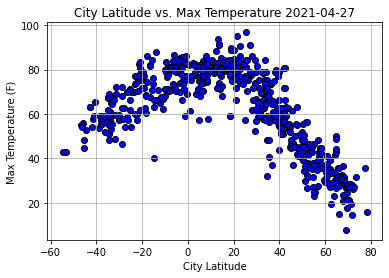

In [50]:
#Scatter Plot Latitude vs Max Temperature
today = date.today()
plt.scatter(x=weather_df["Lat"],y=weather_df["Max Temp"], color="blue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

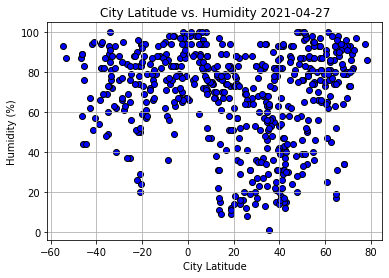

In [51]:
#Scatter Plot Latitude vs Humidity
plt.scatter(x=weather_df["Lat"],y=weather_df["Humidity"], color="blue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity {today}")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

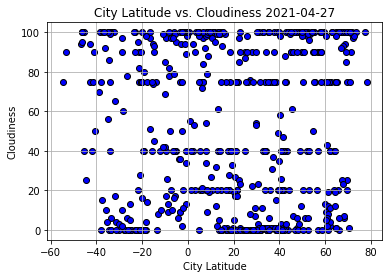

In [52]:
#Scatter Plot Latitude vs Cloudiness
plt.scatter(x=weather_df["Lat"],y=weather_df["Cloudiness"], color="blue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("../output_data/Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

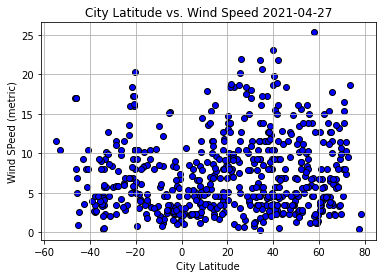

In [53]:
#Scatter Plot Latitude vs Wind Speed
plt.scatter(x=weather_df["Lat"],y=weather_df["Wind Speed"], color="blue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.xlabel("City Latitude")
plt.ylabel("Wind SPeed (metric)")
plt.grid()
plt.savefig("../output_data/Lat_vs_Wind_Speed.png")

## Linear Regression

In [54]:
#Split df by hemisphere
northern_hemisphere = weather_df.loc[weather_df["Lat"]>=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8882958443233024


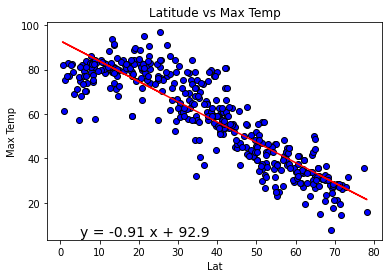

In [68]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])
regress_values=northern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"],color="b",edgecolors="black")
plt.plot(northern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(5,5), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7430381991928698


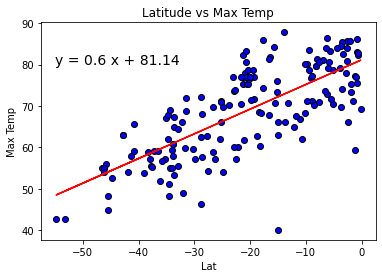

In [75]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])
regress_values=southern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"],color="b",edgecolors="black")
plt.plot(southern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(-55,80), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
print(f"The r value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.11056301879747131


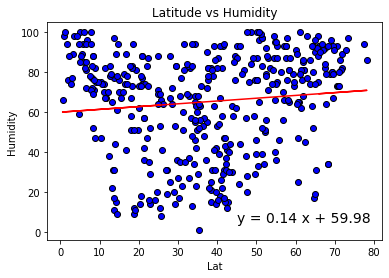

In [82]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])
regress_values=northern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Humidity"],color="b",edgecolors="black")
plt.plot(northern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(45,5), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.10257758645499733


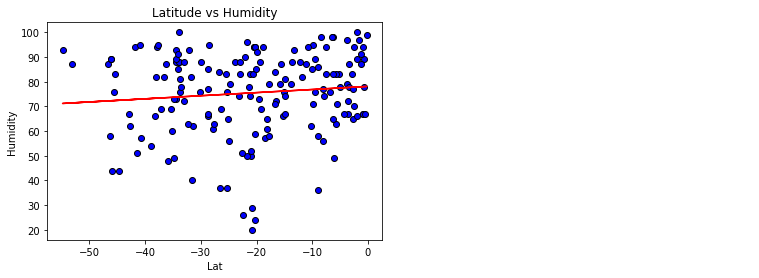

In [83]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])
regress_values=southern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Humidity"],color="b",edgecolors="black")
plt.plot(southern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(45,5), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
print(f"The r value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.128759071299452


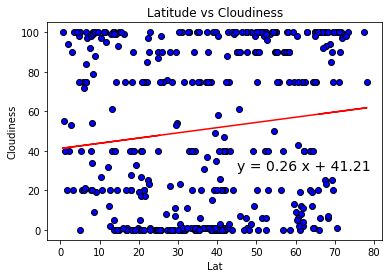

In [85]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])
regress_values=northern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"],color="b",edgecolors="black")
plt.plot(northern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(45,30), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.05653625353237595


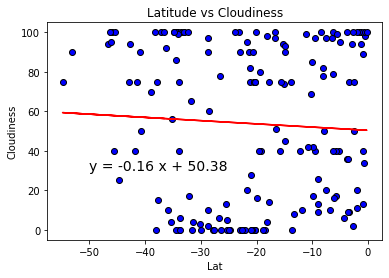

In [87]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])
regress_values=southern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"],color="b",edgecolors="black")
plt.plot(southern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(-50,30), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
print(f"The r value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.05488387745062209


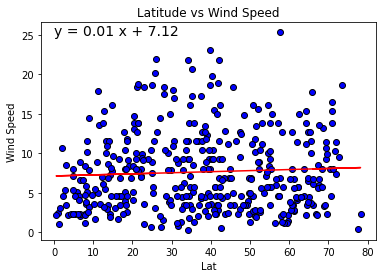

In [91]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])
regress_values=northern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"],color="b",edgecolors="black")
plt.plot(northern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(0,25), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.2160119255336705


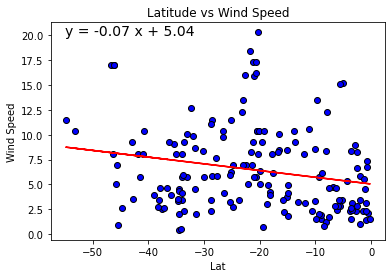

In [95]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])
regress_values=southern_hemisphere["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"],color="b",edgecolors="black")
plt.plot(southern_hemisphere["Lat"], regress_values, color= "r")
plt.annotate(line_eq,(-55,20), fontsize=14)
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
print(f"The r value is: {rvalue}")
plt.show()

In [3]:
#Analysis Observable Trends:
#1. Higher temperatures at zero latitude or the equator.
#2. There is not a high correlation between latitude, wind speed, and cloudiness.
#3. More cloud cover exists away from the equator.
